# Assignment1

### 3.1 Pseudonymisation

Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [27]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_54440/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 23 NaN

In [28]:
df=df.dropna(thresh=23)


Display

In [29]:
display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
12,11416.0,Mike Abgarian,NaN,NaN,NaN,Male,31.0,65.0,150.0,119.0,...,465.0,405.0,81.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN
20,21053.0,Douglas Acker,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,42.0,72.0,210.0,198.0,...,515.0,505.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN
21,21269.0,Erik Acevedo,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,...,385.0,315.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN
22,21685.0,Richard Ablett,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,28.0,70.0,176.0,720.0,...,335.0,254.0,27.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,20.0,67.0,140.0,NaN,...,209.0,180.0,7.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19
422421,385519.0,Dru Miller,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,28.0,70.0,180.0,NaN,...,365.0,285.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25
422518,92194.0,Robert North,North East,BayState CrossFit,BayState CrossFit,Male,40.0,70.0,175.0,479.0,...,275.0,255.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11
422754,539852.0,Ted Worden,South East,Black Box Strong,CrossFit Black Box,Male,27.0,69.0,175.0,399.0,...,385.0,265.0,NaN,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04


In [30]:
df.apply(pd.Series.nunique)

athlete_id            21747
name                  21409
region                   17
team                   3787
affiliate              5921
gender                    2
age                      43
height                   58
weight                  248
fran                    821
helen                   847
grace                   714
filthy50               1767
fgonebad                474
run400                  259
run5k                  1299
candj                   323
snatch                  286
deadlift                431
backsq                  404
pullups                 128
eat                      40
train                    74
background               38
experience               68
schedule                117
howlong                  25
retrieved_datetime    16597
dtype: int64

Text(0.5, 1.0, 'Cardinality')

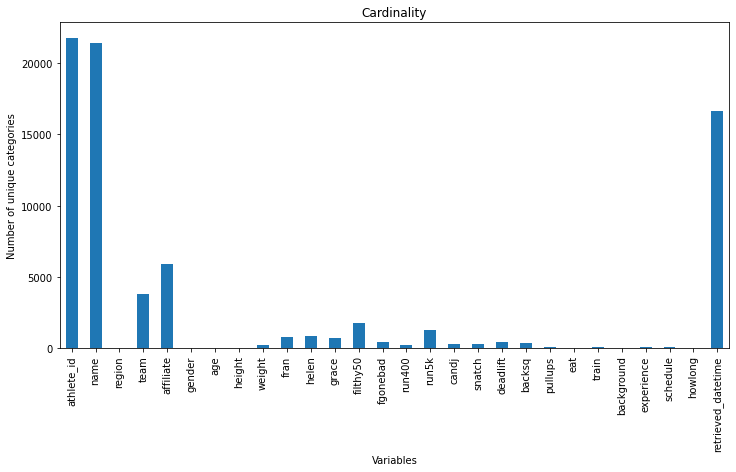

In [31]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [32]:
an = anonymize(df)

display name column and corresponding fake name column

In [33]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Joyce Russell
12,Mike Abgarian,Mrs Lorraine Bolton
20,Douglas Acker,Alexander Simmons
21,Erik Acevedo,Beth Hunt-Thomas
22,Richard Ablett,Dr Benjamin Davison
...,...,...
422278,Carley Feil,Leon Gray
422421,Dru Miller,Leon Roberts
422518,Robert North,Shane Young
422754,Ted Worden,Charlotte Watson


display name athlete_id and corresponding fake id column

In [34]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,PVEW14343868668042
12,11416,WTFN41217870828965
20,21053,ECDJ95165413258914
21,21269,DVVT35356426003389
22,21685,POLA61279173223211
...,...,...
422278,553695,IFIL51877380196577
422421,385519,AWGG34390655145938
422518,92194,ZHLK40662793845028
422754,539852,QBQF33718567477427


In [35]:
duplicate_values = df[df['name'].duplicated()]
display(duplicate_values['name'])

726            Cody Anderson
855            Ryan Anderson
1651             Steve Baker
1808             Eric Barber
2349              Matt Beard
                 ...        
399990       Alexandra Rains
400460      Christina Rivera
403464         Louise Tjäder
417907    Christopher Miller
418424           Jeff Palmer
Name: name, Length: 338, dtype: object

In [36]:
duplicate_values = df[df['Fake_name'].duplicated()]
display(duplicate_values['Fake_name'])

726       Frederick Stephenson
855            Mr Malcolm Nash
1651             Mr Lee Harper
1808               Dawn Wilson
2349                 Jay Stone
                  ...         
421125            Lindsey West
421501              Marc Brown
421684          Gillian Thomas
422072          Vanessa Clarke
422421            Leon Roberts
Name: Fake_name, Length: 1337, dtype: object

### 3.2 Randomisation